In [1]:
from Analyser import distance
from Main import generate_and_analyse

In [9]:
modelName = 'Young_Shrub'
def model(params):
    return generate_and_analyse(modelName, params)

In [10]:
# Some PyABC magic to get our set of parameters
from pyabc import (ABCSMC, Distribution, RV, MultivariateNormalTransition)
import scipy as sp
import scipy.stats as st
import tempfile
import os
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
prior = Distribution(default_slash=RV("uniform", 0, 50))

In [12]:
abc = ABCSMC(model, prior, distance)

In [13]:
db_path = ("sqlite:///" + os.path.join(tempfile.gettempdir(), "test.db"))

In [14]:
target = generate_and_analyse(modelName, {'default_slash': 22.5})

In [15]:
abc.new(db_path, target)

INFO:History:Start <ABCSMC(id=2, start_time=2019-04-10 23:29:21.270392, end_time=None)>
INFO:Epsilon:initial epsilon is 9.204645586908876


2

In [16]:
history = abc.run(minimum_epsilon=2, max_nr_populations=5)

INFO:ABC:t:0 eps:9.204645586908876
INFO:ABC:t:1 eps:4.631356375007932
INFO:ABC:t:2 eps:2.095092018509207
INFO:ABC:t:3 eps:1.6597199411556107
INFO:History:Done <ABCSMC(id=2, start_time=2019-04-10 23:29:21.270392, end_time=2019-04-10 23:32:56.360768)>


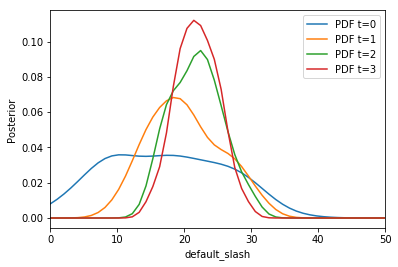

In [18]:
# Visualise results
from pyabc.visualization import plot_kde_1d
fig, ax = plt.subplots()
for t in range(0, history.max_t+1):
    df, w = history.get_distribution(m=0, t=t)
    plot_kde_1d(df, w,
                xmin=0, xmax=50,
                x="default_slash", ax=ax,
                label="PDF t={}".format(t))
ax.legend();